In [60]:
import numpy as np  # Import numpy as np
from scipy import stats  # Import stats from scipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [61]:
#import and read csv //done by all
df = pd.read_csv("heart.csv")

In [62]:
#Our Dataset // done by all
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [63]:
#Checking type of data types
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# DATA CLEANING SECTION
### Done By:
##### 221141030 - KALLINA JOSEPH
##### 222091789 - ESTHER KADHIKWA
##### 223084433 - TUPOPILA KADHILA 
##### 222119810 - SLYSKEN KAKUVA


In [65]:
#Change Column Names // By Kallina Joseph
# Renaming specific columns 
df = df.rename(columns={
    'cp': 'Chest Pain',                                
    'trtbps': 'resting blood pressure',                                  
    'chol': 'cholestoral',                                  
    'fbs': 'fasting blood sugar',                              
    'restecg': 'resting electrocardiographic results',                               
    'thalachh': 'maximum heart rate achieved',             
                  
})

# Display the DataFrame with new column names
print(df)

df.to_csv('heart2.csv', index=False)

     age  sex  Chest Pain  resting blood pressure  cholestoral  \
0     63    1           3                     145          233   
1     37    1           2                     130          250   
2     41    0           1                     130          204   
3     56    1           1                     120          236   
4     57    0           0                     120          354   
..   ...  ...         ...                     ...          ...   
298   57    0           0                     140          241   
299   45    1           3                     110          264   
300   68    1           0                     144          193   
301   57    1           0                     130          131   
302   57    0           1                     130          236   

     fasting blood sugar  resting electrocardiographic results  \
0                      1                                     0   
1                      0                                     1   
2        

In [66]:
df

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [67]:
#Check for Duplicates //done by 222119810 - Slyken Kakuva
df.duplicated().any()

True

In [68]:
#Print of the Duplicate values //done by 222119810 - Slysken Kakuva
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
#Duplicate values found in row 164 //done by 222119810 - Slysken Kakuva

     age  sex  Chest Pain  resting blood pressure  cholestoral  \
164   38    1           2                     138          175   

     fasting blood sugar  resting electrocardiographic results  \
164                    0                                     1   

     maximum heart rate achieved  exng  oldpeak  slp  caa  thall  output  
164                          173     0      0.0    2    4      2       1  


In [69]:
#Removal of the duplocate values and then print the result //done by 222119810 - Slysken Kakuva
df.drop_duplicates(inplace=True)
#Duplicate values found in row 164 have successfully been removed //done by 222119810 - Slysken Kakuva
df

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [70]:
df.isnull().any()

age                                     False
sex                                     False
Chest Pain                              False
resting blood pressure                  False
cholestoral                             False
fasting blood sugar                     False
resting electrocardiographic results    False
maximum heart rate achieved             False
exng                                    False
oldpeak                                 False
slp                                     False
caa                                     False
thall                                   False
output                                  False
dtype: bool

In [71]:
#Checking if all duplicates were dropped
df.duplicated().any()

False

In [72]:
#to check if something is unusual //done by Kallina Joseph
df.head()

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
#to check if something is unusual //done by Kallina Joseph
df.tail()

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [74]:
df

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [75]:
any_missing = df.isnull().any()
print(any_missing)


age                                     False
sex                                     False
Chest Pain                              False
resting blood pressure                  False
cholestoral                             False
fasting blood sugar                     False
resting electrocardiographic results    False
maximum heart rate achieved             False
exng                                    False
oldpeak                                 False
slp                                     False
caa                                     False
thall                                   False
output                                  False
dtype: bool


# Data Exploration
## Descriptive analysis
By Rizenga Leonardo Kamuinjo

In [76]:
print("Column names in the dataset:", df.columns)

Column names in the dataset: Index(['age', 'sex', 'Chest Pain', 'resting blood pressure', 'cholestoral',
       'fasting blood sugar', 'resting electrocardiographic results',
       'maximum heart rate achieved', 'exng', 'oldpeak', 'slp', 'caa', 'thall',
       'output'],
      dtype='object')


In [77]:
print("Shape of the data (rows,columns):",df.shape)

chol_mean = df['cholestoral'].mean()
print(f"Mean Cholesterol: {chol_mean}")

age_mean = df['age'].mean()
print(f"Mean Age: {age_mean}")

trtbps_mean = df['resting blood pressure'].mean()
print(f"Mean for resting blood pressure: {trtbps_mean}")

thalachh_mean = df['maximum heart rate achieved'].mean()
print(f"Mean for the maximum heart rate achieved: {thalachh_mean}")

oldpeak_mean = df['oldpeak'].mean()
print(f"Mean oldpeak: {oldpeak_mean}")

Shape of the data (rows,columns): (302, 14)
Mean Cholesterol: 246.5
Mean Age: 54.420529801324506
Mean for resting blood pressure: 131.60264900662253
Mean for the maximum heart rate achieved: 149.56953642384107
Mean oldpeak: 1.0430463576158941


In [78]:
# Calculate and print median values
chol_median = df['cholestoral'].median()
print(f"Median Cholesterol: {chol_median}")

age_median = df['age'].median()
print(f"Median Age: {age_median}")

trtbps_median = df['resting blood pressure'].median()
print(f"Median for resting blood pressure: {trtbps_median}")

thalachh_median = df['maximum heart rate achieved'].median()
print(f"Median for the maximum heart rate achieved: {thalachh_median}")

oldpeak_median = df['oldpeak'].median()
print(f"Median oldpeak: {oldpeak_median}")

Median Cholesterol: 240.5
Median Age: 55.5
Median for resting blood pressure: 130.0
Median for the maximum heart rate achieved: 152.5
Median oldpeak: 0.8


In [79]:
# Calculate and print mode values
chol_mode = df['cholestoral'].mode()[0]  # Use the first mode value
print(f"Mode Cholesterol: {chol_mode}")

age_mode = df['age'].mode()[0]
print(f"Mode Age: {age_mode}")

trtbps_mode = df['resting blood pressure'].mode()[0]
print(f"Mode for resting blood pressure: {trtbps_mode}")

thalachh_mode = df['maximum heart rate achieved'].mode()[0]
print(f"Mode for the maximum heart rate achieved: {thalachh_mode}")

oldpeak_mode = df['oldpeak'].mode()[0]
print(f"Mode oldpeak: {oldpeak_mode}")

Mode Cholesterol: 197
Mode Age: 58
Mode for resting blood pressure: 120
Mode for the maximum heart rate achieved: 162
Mode oldpeak: 0.0


In [80]:
# Calculate and print Variance values
chol_var = df['cholestoral'].var()
print(f"Variance for Cholesterol: {chol_var}")

age_var = df['age'].var()
print(f"Variance for age: {age_var}")

trtbps_var = df['resting blood pressure'].var()
print(f"Variance for resting blood pressure: {trtbps_var}")

thalachh_var = df['maximum heart rate achieved'].var()
print(f"Variance for the maximum heart rate achieved: {thalachh_var}")

oldpeak_var = df['oldpeak'].var()
print(f"Variance for oldpeak: {oldpeak_var}")

Variance for Cholesterol: 2678.423588039867
Variance for age: 81.8657565290094
Variance for resting blood pressure: 308.4728168797167
Variance for the maximum heart rate achieved: 524.5715605817252
Variance for oldpeak: 1.3489714197707428


In [81]:

# Calculate and print Standard deviation values
chol_std = df['cholestoral'].std()
print(f"Standard deviation for Cholesterol: {chol_std}")

age_std = df['age'].std()
print(f"Standard deviation for age: {age_std}")

trtbps_std = df['resting blood pressure'].std()
print(f"Standard deviation for resting blood pressure: {trtbps_std}")

thalachh_std = df['maximum heart rate achieved'].std()
print(f"Standard deviation for the maximum heart rate achieved: {thalachh_std}")

oldpeak_std = df['oldpeak'].std()
print(f"Standard deviation for oldpeak: {oldpeak_std}")

Standard deviation for Cholesterol: 51.75348865574056
Standard deviation for age: 9.047969746247464
Standard deviation for resting blood pressure: 17.56339423003756
Standard deviation for the maximum heart rate achieved: 22.90352725196984
Standard deviation for oldpeak: 1.1614522890634564


In [82]:
# Done by Esther Kadhikwa
# Detect and remove outliers using z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_cleaned = df[(z_scores < 3).all(axis=1)]

# Display the shape of the dataset before and after removing outliers
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_cleaned.shape}")


Original data shape: (302, 14)
Data shape after removing outliers: (287, 14)


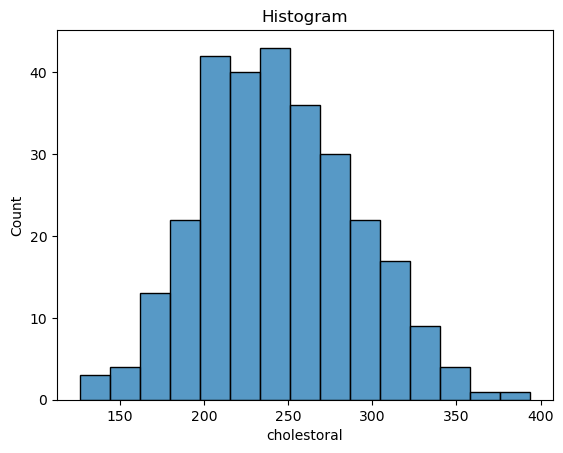

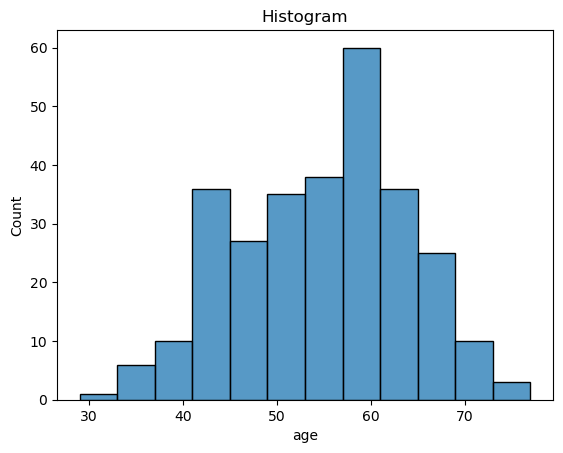

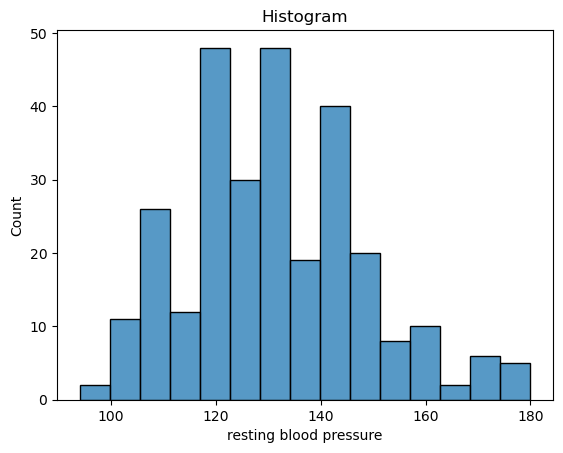

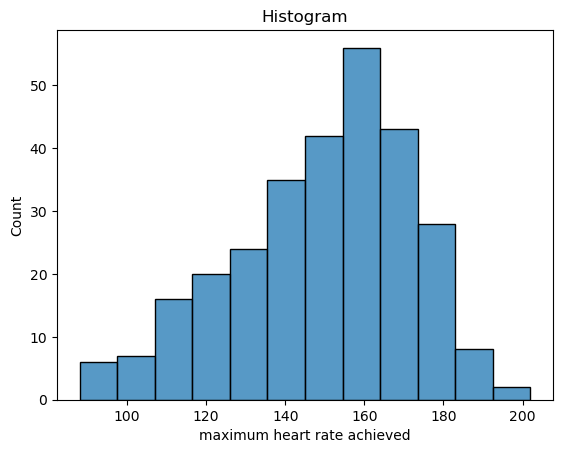

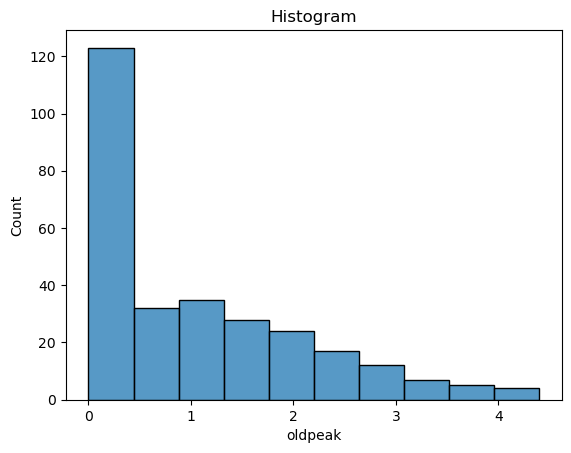

Skewness: [ 0.24430542 -0.18335668  0.5279344  -0.47138412  0.97910445]
Kurtosis: [-0.14492382 -0.55042754  0.21859423 -0.3429186   0.1436728 ]


In [83]:
sns.histplot(df_cleaned['cholestoral'], kde=False)
plt.title('Histogram')
plt.show()

sns.histplot(df_cleaned['age'], kde=False)
plt.title('Histogram')
plt.show()

sns.histplot(df_cleaned['resting blood pressure'], kde=False)
plt.title('Histogram')
plt.show()

sns.histplot(df_cleaned['maximum heart rate achieved'], kde=False)
plt.title('Histogram')
plt.show()

sns.histplot(df_cleaned['oldpeak'], kde=False)
plt.title('Histogram')
plt.show()

columns_to_analyze = ['cholestoral', 'age', 'resting blood pressure', 'maximum heart rate achieved', 'oldpeak']

print(f"Skewness: {skew(df_cleaned[columns_to_analyze])}")
print(f"Kurtosis: {kurtosis(df_cleaned[columns_to_analyze])}")

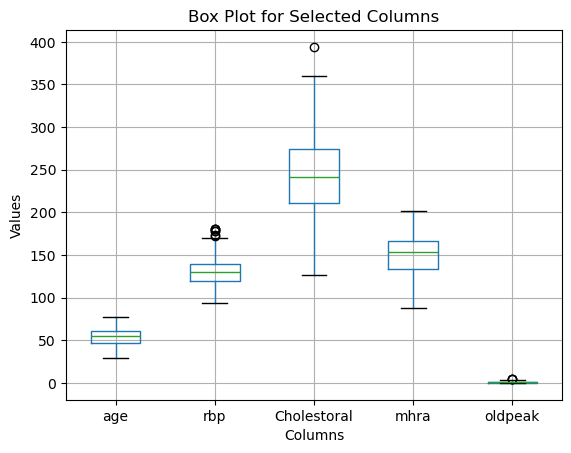

In [84]:
# Specify the columns to plot
columns_to_plot = ['age', 'resting blood pressure', 'cholestoral', 'maximum heart rate achieved', 'oldpeak']

renamed_columns = ['age', 'rbp', 'Cholestoral', 'mhra', 'oldpeak']

# Rename the columns
df_renamed = df_cleaned[columns_to_plot].rename(columns=dict(zip(columns_to_plot, renamed_columns)))

# Create box plots for the selected columns
df_renamed.boxplot()
plt.title('Box Plot for Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

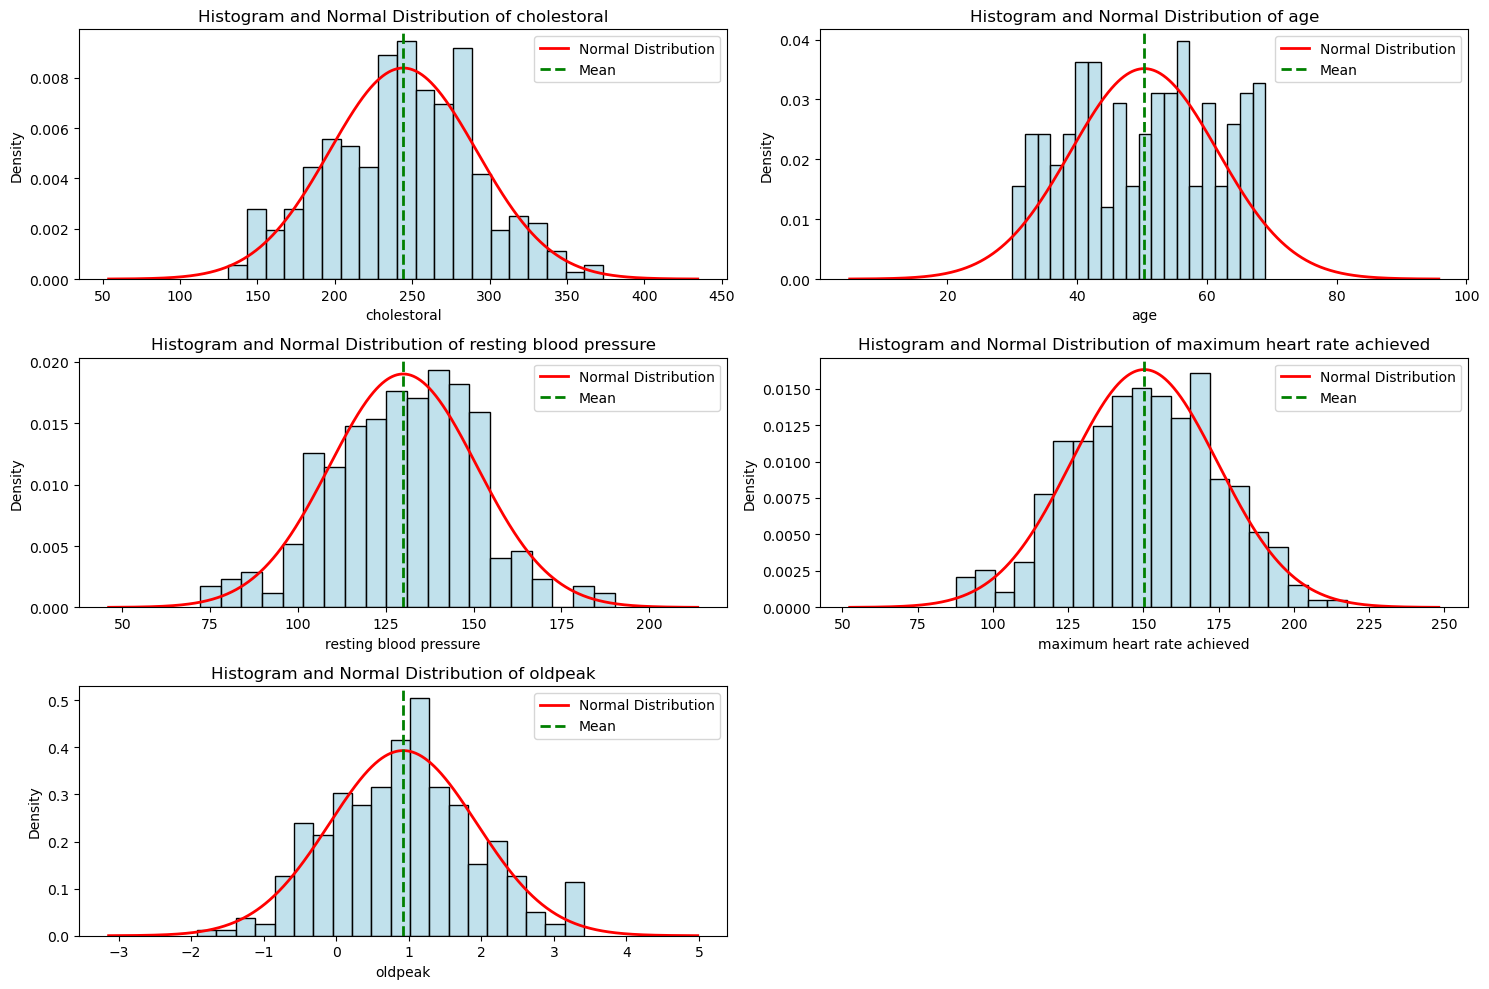

In [3]:
# done by JOHANNES ANDREAS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load your dataset into a DataFrame (modify the path as needed)
# df = pd.read_csv('your_data.csv')  # Uncomment and set the correct path

# Example: Create a sample DataFrame (you should replace this with your actual data)
data = {
    'age': np.random.randint(30, 70, 302),
    'cholestoral': np.random.normal(240, 50, 302),
    'resting blood pressure': np.random.normal(130, 20, 302),
    'maximum heart rate achieved': np.random.normal(150, 25, 302),
    'oldpeak': np.random.normal(1, 1, 302),
}
df = pd.DataFrame(data)

# Clean the DataFrame by removing outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_cleaned = df[(z_scores < 3).all(axis=1)]

# Define the columns to analyze
columns_to_analyze = ['cholestoral', 'age', 'resting blood pressure', 'maximum heart rate achieved', 'oldpeak']

# Create plots for normal distribution
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_analyze, 1):
    # Calculate mean and standard deviation
    mean = df_cleaned[column].mean()
    std_dev = df_cleaned[column].std()

    # Generate data points for the normal distribution
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
    y = stats.norm.pdf(x, mean, std_dev)

    # Plotting
    plt.subplot(3, 2, i)
    sns.histplot(df_cleaned[column], bins=20, kde=False, stat='density', color='lightblue', edgecolor='black')
    plt.plot(x, y, color='red', label='Normal Distribution', linewidth=2)
    plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Mean')
    plt.title(f'Histogram and Normal Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


In [85]:
data = df_cleaned[columns_to_analyze].dropna()
t_stat, p_value = stats.ttest_1samp(data, 50)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: [  71.75559453    8.07544129   80.78224049   74.97823004 -768.05975927], P-value: [6.50696247e-185 1.88977060e-014 6.12051893e-199 4.27774725e-190
 0.00000000e+000]


In [86]:
df_cleaned.head()

,age,sex,Chest Pain,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
# Convert specific columns to categorical data types
df_cleaned.loc[:, 'sex'] = df_cleaned['sex'].astype('category')
df_cleaned.loc[:, 'Chest Pain'] = df_cleaned['Chest Pain'].astype('category')
df_cleaned.loc[:, 'thall'] = df_cleaned['thall'].astype('category')
df_cleaned.loc[:, 'exng'] = df_cleaned['exng'].astype('category')
df_cleaned.loc[:, 'caa'] = df_cleaned['caa'].astype('category')
df_cleaned.loc[:, 'fasting blood sugar'] = df_cleaned['fasting blood sugar'].astype('category')
df_cleaned.loc[:, 'resting electrocardiographic results'] = df_cleaned['resting electrocardiographic results'].astype('category')


# Display the data types after conversion
print(df_cleaned.dtypes)


age                                       int64
sex                                       int64
Chest Pain                                int64
resting blood pressure                    int64
cholestoral                               int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
maximum heart rate achieved               int64
exng                                      int64
oldpeak                                 float64
slp                                       int64
caa                                       int64
thall                                     int64
output                                    int64
dtype: object


In [91]:
# Normalize the 'trtbps' (resting blood pressure) and 'chol' (cholesterol) columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned.loc[:,['resting blood pressure', 'cholestoral']] = scaler.fit_transform(df_cleaned[['resting blood pressure', 'cholestoral']])

# Display the first few rows of the normalized data
print(df_cleaned[['resting blood pressure', 'cholestoral']].head())


   resting blood pressure  cholestoral
0                0.593023     0.399254
1                0.418605     0.462687
2                0.418605     0.291045
3                0.302326     0.410448
4                0.302326     0.850746


In [92]:
# One-hot encode categorical columns like 'cp' and 'thall'
df_encoded = pd.get_dummies(df_cleaned, columns=['Chest Pain', 'thall'], drop_first=True)

# Display the first few rows of the dataset after encoding
print(df_encoded.head())


   age  sex  resting blood pressure  cholestoral  fasting blood sugar  \
0   63    1                0.593023     0.399254                    1   
1   37    1                0.418605     0.462687                    0   
2   41    0                0.418605     0.291045                    0   
3   56    1                0.302326     0.410448                    0   
4   57    0                0.302326     0.850746                    0   

   resting electrocardiographic results  maximum heart rate achieved  exng  \
0                                     0                          150     0   
1                                     1                          187     0   
2                                     0                          172     0   
3                                     1                          178     0   
4                                     1                          163     1   

   oldpeak  slp  caa  output  Chest Pain_1  Chest Pain_2  Chest Pain_3  \
0      2.3    0   

Machine learning  


import numpy as np
from scipy import stats

# Sample data
data1 = np.random.normal(50, 10, 100)
data2 = np.random.normal(52, 10, 100)

# Perform t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


MACHINE LEARNING 
BY Katrin
Tupopila 
Onesmus
Kandjala

In [93]:
#Validation of dataset
array = df_cleaned.values
X = array[:, 0:12]
Y = array[:, 12]
validation_size = 0.20
seed = 5
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [99]:


# Creating a list of models 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
validation_size = 0.20
seed = 7
scoring = 'accuracy'  # Specify your scoring metric

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_validation)  # If needed for test set

# Use the scaled data for training
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.699012 (0.067472)
LDA: 0.699012 (0.077877)
KNN: 0.650791 (0.084144)
CART: 0.606719 (0.068876)
NB: 0.344862 (0.085220)
SVM: 0.655534 (0.088709)


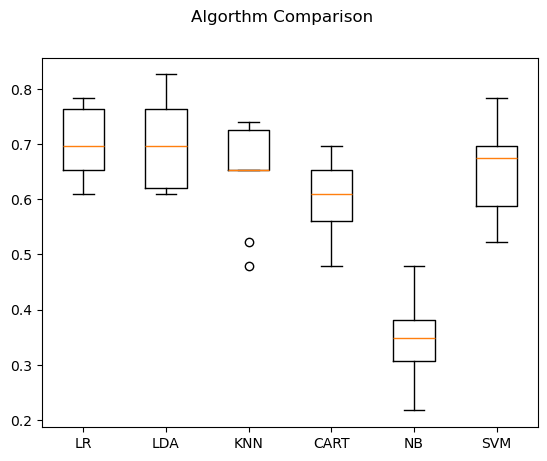

In [100]:
# Compare Algos
fig = plt.figure()
fig.suptitle('Algorthm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [101]:
# predictions 
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
print(iris.target)
print(iris.target_names)
print(iris.target.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
(150,)


In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn = KNeighborsClassifier(n_neighbors=5)

In [104]:
X = iris.data
y = iris.target

In [109]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [113]:
Y_pred =knn.predict(X_validation)

In [115]:
accuracy = accuracy_score(Y_validation, Y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

KNN Accuracy: 56.90%
